In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.image as mp

In [ ]:

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
with open('/content/drive/My Drive/test/teltest.txt') as file:
    mal_txt = file.read().split('\n')
with open('/content/drive/My Drive/test/engtest.txt') as file:
    eng_txt = file.read().split('\n')
with open('/content/drive/My Drive/test/testimages.txt') as file:
   test_images = file.read().split('\n')


In [ ]:
len(test_images)

1595

In [ ]:
len(eng_txt)

1595

In [ ]:
len(mal_txt)

1595

In [ ]:
img_path=[]
for s in test_images:
    img_path.append("/content/drive/My Drive/testimg/"+s+".jpg")

In [ ]:
len(img_path)

1595

/content/drive/My Drive/testimg/2339.jpg
mal:రోడ్డు పక్కన పార్క్ చేసిన కార్లు
eng:cars parked along the side of the road	    


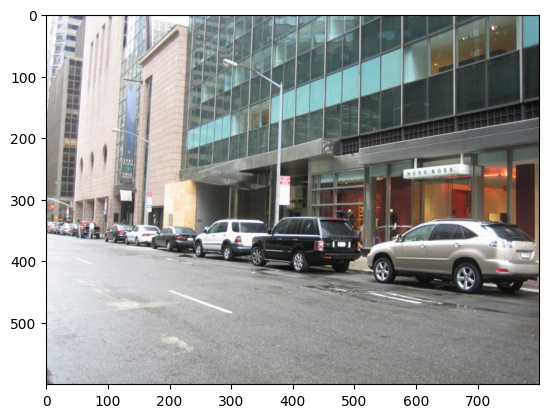

In [ ]:
im=mp.imread(img_path[3])
plt.imshow(im)
print(img_path[3])
print("mal:"+mal_txt[3])
print("eng:"+eng_txt[3])

In [ ]:
import pandas as pd
df = pd.read_csv ('/content/drive/My Drive/test/testcrop.csv')
print(df)

        X    Y    W    H
0     401  360   12   19
1     221   50   87  170
2     168  154  196   76
3      30  217  738  326
4     324  195   90  184
...   ...  ...  ...  ...
1590  165  179   74  142
1591    1   23  493  276
1592   38   63  384  379
1593  136  109  360  220
1594  316    0   49   52

[1595 rows x 4 columns]


In [ ]:
from keras.applications import ResNet50
from keras.models import Model
model_resnet = ResNet50(include_top=True, weights="imagenet")
model_resnet.layers.pop()
model_resnet = Model(inputs=model_resnet.inputs, outputs=model_resnet.layers[-2].output)
model_resnet.summary()


102967424/102967424 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                       

In [ ]:
from keras.applications import InceptionV3
from keras.models import Model
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.inception_v3 import preprocess_input
from collections import OrderedDict

# Load InceptionV3 model
model_inception = InceptionV3(include_top=True, weights='imagenet')
model_inception.layers.pop()
model_inception = Model(inputs=model_inception.inputs, outputs=model_inception.layers[-2].output)
model_inception.summary()

In [ ]:
import cv2

In [ ]:
dfnew=df

In [ ]:
df

,X,Y,W,H
0,401,360,12,19
1,221,50,87,170
2,168,154,196,76
3,30,217,738,326
4,324,195,90,184
...,...,...,...,...
1590,165,179,74,142
1591,1,23,493,276
1592,38,63,384,379
1593,136,109,360,220


In [ ]:
splits=len(df)
dfnew=df
imagedata=np.zeros(shape=(splits,224,224,3))
for i in range(splits):
    temp=mp.imread(img_path[i])
    X=dfnew['X'].values[i]
    Y=dfnew['Y'].values[i]
    W=dfnew['W'].values[i]
    H=dfnew['H'].values[i]
    temp = temp[Y:Y+H, X:X+W]
    if (len(temp.shape)==3):
      try:
         temp=cv2.resize(temp,(224,224))
         imagedata[i]=temp
      except:
        break
    elif (len(temp.shape)<3):
       #plt.imshow(temp)
       temp=cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
       temp=cv2.resize(temp,(224,224))
       imagedata[i]=temp
imagedata=imagedata/255
imagedata=imagedata.astype(np.float16)

In [ ]:
imagedata[1]

array([[[0.7725, 0.718 , 0.6157],
        [0.7646, 0.71  , 0.612 ],
        [0.7334, 0.682 , 0.5884],
        ...,
        [0.4314, 0.4824, 0.4785],
        [0.4314, 0.4863, 0.4824],
        [0.4314, 0.4863, 0.4863]],

       [[0.8115, 0.757 , 0.655 ],
        [0.8037, 0.749 , 0.651 ],
        [0.7725, 0.7217, 0.6274],
        ...,
        [0.4275, 0.4785, 0.4746],
        [0.4197, 0.4746, 0.4746],
        [0.4197, 0.4746, 0.4746]],

       [[0.8237, 0.7686, 0.6665],
        [0.82  , 0.7646, 0.6626],
        [0.796 , 0.745 , 0.647 ],
        ...,
        [0.4275, 0.4746, 0.4746],
        [0.4158, 0.4626, 0.4666],
        [0.4119, 0.4626, 0.4626]],

       ...,

       [[0.741 , 0.604 , 0.4626],
        [0.7373, 0.6   , 0.4626],
        [0.7256, 0.5884, 0.447 ],
        ...,
        [0.9214, 0.8115, 0.643 ],
        [0.9253, 0.816 , 0.651 ],
        [0.9253, 0.816 , 0.651 ]],

       [[0.8394, 0.714 , 0.5767],
        [0.8354, 0.71  , 0.5728],
        [0.8237, 0.702 , 0.565 ],
        .

In [ ]:
with open('/content/drive/My Drive/imagedatas1.txt', 'w') as writefile:
    writefile.write("imagedata")

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.resnet50 import preprocess_input as pre1
from keras.applications.inception_v3 import preprocess_input as pre2
from collections import OrderedDict

jpgs = img_path[:splits]
images_new = OrderedDict()
images_newv = OrderedDict()

npix_resnet = 224
npix_inception = 299
target_size_resnet = (npix_resnet, npix_resnet, 3)
target_size_inception = (npix_inception, npix_inception, 3)

for i, name in enumerate(jpgs):
    filename = name
    # Load and preprocess for ResNet
    image_resnet = load_img(filename, target_size=target_size_resnet)
    image_resnet = img_to_array(image_resnet)
    nimage_resnet = pre1(image_resnet)
    y_pred_resnet = model_resnet.predict(nimage_resnet.reshape((1,) + nimage_resnet.shape[:3]))
    images_new[name] = y_pred_resnet.flatten()

    # Load and preprocess for Inception
    image_inception = load_img(filename, target_size=target_size_inception)
    image_inception = img_to_array(image_inception)
    nimage_inception = pre2(image_inception)
    y_pred_inception = model_inception.predict(nimage_inception.reshape((1,) + nimage_inception.shape[:3]))
    images_newv[name] = y_pred_inception.flatten()

    if i % 200 == 0:
        print(i, filename)

1/1 [==============================] - 3s 3s/step
0 /content/drive/My Drive/testimg/780.jpg
1/1 [==============================] - 0s 201ms/step
200 /content/drive/My Drive/testimg/2341298.jpg
1/1 [==============================] - 0s 195ms/step
400 /content/drive/My Drive/testimg/2370984.jpg
1/1 [==============================] - 0s 321ms/step
600 /content/drive/My Drive/testimg/2389619.jpg
1/1 [==============================] - 0s 197ms/step
800 /content/drive/My Drive/testimg/2363439.jpg
1/1 [==============================] - 0s 195ms/step
1000 /content/drive/My Drive/testimg/2368195.jpg
1/1 [==============================] - 0s 211ms/step
1200 /content/drive/My Drive/testimg/2342912.jpg
1/1 [==============================] - 0s 204ms/step
1400 /content/drive/My Drive/testimg/2392722.jpg
1/1 [==============================] - 0s 195ms/step


In [ ]:
resnet_feature=np.zeros(shape=(len(jpgs), 7, 7, 2048))
for i in range(len(jpgs)):
    resnet_feature[i]=images_new[jpgs[i]]

In [ ]:
inc_feature=np.zeros(shape=(len(jpgs), 7, 7, 2048))
for i in range(len(jpgs)):
    inc_feature[i]=images_newv[jpgs[i]]

In [ ]:

import numpy as np

In [ ]:
np.save('/content/drive/My Drive/testfeature.npy', resnet_feature)

In [ ]:
np.save('/content/drive/My Drive/vtestfeature.npy', inc_feature )

In [ ]:
np.save('/content/drive/My Drive/testdata.npy', imagedata)